In [60]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from src import AcFCM

In [61]:
def plot_datapoints(X: np.ndarray, y: np.ndarray):
    fig, ax = plt.subplots()
    fig.set_figwidth(10)
    fig.set_figheight(8)
    ax.scatter(X[:, 0], X[:, 1], c=y)
    plt.show()

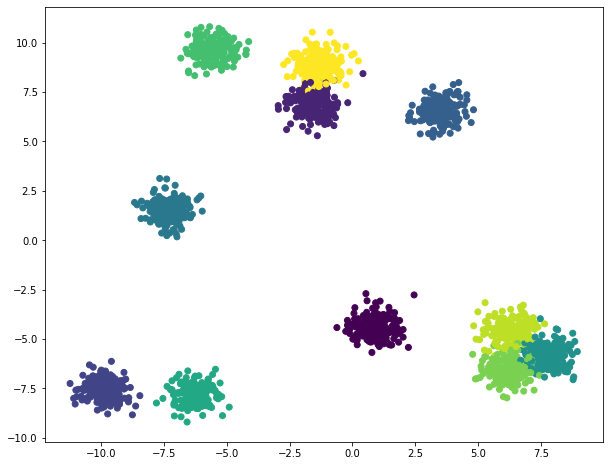

In [76]:
X, y = make_blobs(n_samples=2000, centers=11, cluster_std=0.5, random_state=100)
plot_datapoints(X, y)

V_XB: 0.7280838866828513, clusters: 20
V_XB: 0.5827417233454065, clusters: 19
V_XB: 0.5756022734702079, clusters: 18
V_XB: 0.574662917472828, clusters: 17
V_XB: 0.5205807777851088, clusters: 16
V_XB: 0.5121212492790881, clusters: 15
V_XB: 0.48049976375746456, clusters: 14
V_XB: 0.3422990685981404, clusters: 13
V_XB: 0.24049057166980847, clusters: 12
V_XB: 0.14115565728196786, clusters: 11


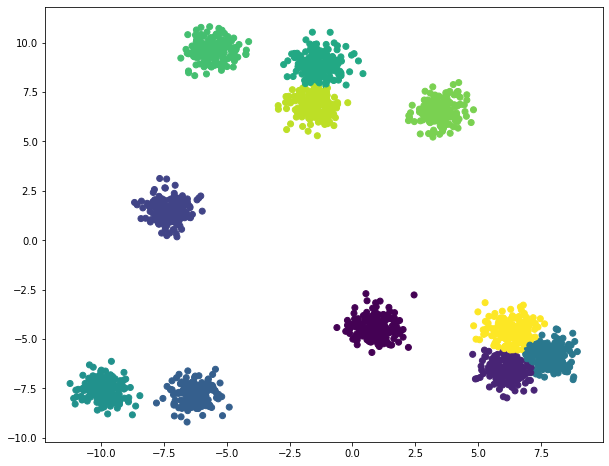

In [81]:
ac_fcm = AcFCM(X, 20)
plot_datapoints(X, np.argmax(ac_fcm.run()[0], axis=1))